In [1]:
from functions.sky_functions import *
from functions.alignment_functions import *
from functions.visualization_functions import *

from astropy.table import Table

## Load in data
Must be a catalog of 2d shapes with compex ellipticities [E1, E2] and positions [RA, DEC]
If using color weights, that is also necessary

We will look at data from SDSS (available here http://skyserver.sdss.org/dr16/en/help/docs/realquery.aspx)<br>
This is a 5400 deg$^2$ area from the center of SDSS's footprint

In [24]:
LRGs = Table.read('sample_data/SDSS_LRG_shapes.fit')
LRGs = LRGs[((LRGs['rz_color']>-20)&(LRGs['rz_color']<10))] # removing unreasonably colored galaxies
LRGs = LRGs[(LRGs['z']<28)] # basic redshift cut

Let's take a look at the data

In [32]:
LRGs[:4]

RA,DEC,E1,E2,rz_color,z
float64,float64,float32,float32,float32,float32
193.6579191610204,51.03833180811057,-0.35749626,-0.072722055,0.9126663,18.12726
193.65590483221538,51.03608842458875,0.0930828,0.9107662,0.972002,16.856451
164.51468456187067,54.585392545384984,0.03484281,0.047831368,1.0860443,18.060013
216.61058857842534,31.926104829994898,0.64686507,-0.049064793,0.6857414,18.1551


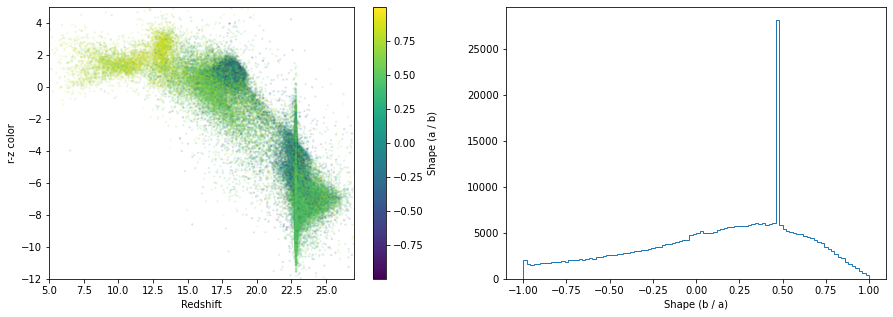

In [33]:
fig = plt.figure(figsize=(15,5))

axis_a, axis_b = a_b(np.asarray(LRGs['E1']), np.asarray(LRGs['E2']))
axis_ratios = axis_b / axis_a

plt.subplot(121)
plt.scatter(LRGs['z'], LRGs['rz_color'], c=axis_ratios, s=2, alpha=.1);
color_bar = plt.colorbar(label='Shape (a / b)')
color_bar.set_alpha(1)
color_bar.draw_all()
plt.xlim(5, 27); plt.ylim(-12, 5)
plt.xlabel('Redshift'); plt.ylabel('r-z color');

plt.subplot(122)
plt.hist(axis_ratios, bins=100, histtype='step');
plt.xlabel('Shape (b / a)');

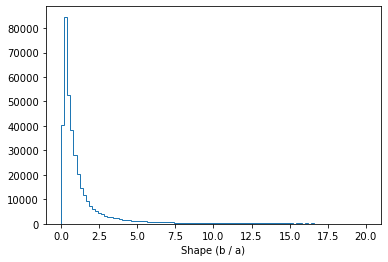

In [65]:
axis_a, axis_b = a_b(np.asarray(LRGs['E2']), np.asarray(LRGs['E1']))
axis_ratios = axis_b / axis_a
abse = abs_e(LRGs['E1'], LRGs['E2'])
plt.hist(abse[(abse<20)], bins=100, histtype='step');
plt.xlabel('Shape (b / a)');

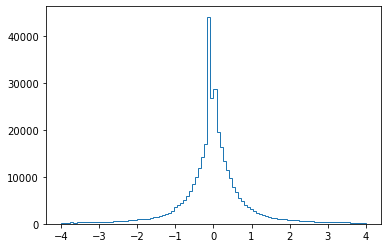

In [74]:
plt.hist(LRGs['E2'][(np.abs(LRGs['E2'])<4)], bins=100, histtype='step');

Galaxies at lower redshifts

## Measure alignment

In [6]:
measure_alignment_phot(LRGs, weights=None, save_path='sample_results/alignment_SDSS1_', delta_rw1_max=5, rcolor='rz_color')

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/astropy/table/table.py:3075: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


Working on 1/100
So far it's been 0.009  minutes

Working on 11/100
So far it's been 0.057  minutes

Working on 21/100
So far it's been 0.1  minutes

Working on 31/100
So far it's been 0.145  minutes

Working on 41/100
So far it's been 0.19  minutes

Working on 51/100
So far it's been 0.238  minutes

Working on 61/100
So far it's been 0.28  minutes

Working on 71/100
So far it's been 0.322  minutes

Working on 81/100
So far it's been 0.363  minutes

Working on 91/100
So far it's been 0.412  minutes

Finished! Total time:  0.4495637178  minutes



#### Measuring alignment again, but without a stricter limit on delta_rw1_max
This is the maximum ammount of r-w1 color difference that two galaxies can have to be counted as a pair. Generally, the closer two galaxies are in color space, the more likely they are to be physically associated.

In [21]:
measure_alignment_phot(LRGs, weights=None, save_path='sample_results/alignment_SDSS2_', delta_rw1_max=.05, rcolor='rz_color')

Working on 1/100
So far it's been 0.006  minutes

Working on 11/100
So far it's been 0.031  minutes

Working on 21/100
So far it's been 0.056  minutes

Working on 31/100
So far it's been 0.081  minutes

Working on 41/100
So far it's been 0.106  minutes

Working on 51/100
So far it's been 0.131  minutes

Working on 61/100
So far it's been 0.156  minutes

Working on 71/100
So far it's been 0.179  minutes

Working on 81/100
So far it's been 0.204  minutes

Working on 91/100
So far it's been 0.23  minutes

Finished! Total time:  0.2533246994  minutes



## Plotting Results

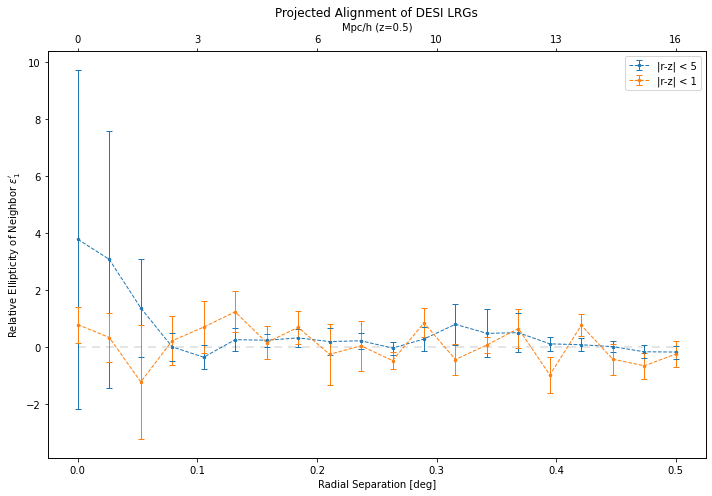

In [22]:
plot_rel_e_phot(results_paths=['sample_results/alignment_SDSS1_', 'sample_results/alignment_SDSS2_'], 
           labels=['|r-z| < 5', '|r-z| < 1'])

As you can see, galaxies which are more likely to be physically near each other are are more aligned.